In [1]:
import pandas as pd
import re
import numpy as np
%matplotlib inline
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
matplotlib.rcParams['pdf.fonttype'] = 42


In [2]:
%matplotlib inline
import seaborn as sns

In [101]:

df = pd.read_csv('Criterion_collection.csv')
df.head()

,title,director,country,spine,url,img,year
0,2 or 3 Things I Know About Her,Jean-Luc Godard,France,482.0,https://www.criterion.com/films/1333-2-or-3-th...,https://s3.amazonaws.com/criterion-production/...,1957.0
1,3:10 to Yuma,Delmer Daves,United States,657.0,https://www.criterion.com/films/27910-3-10-to-...,https://s3.amazonaws.com/criterion-production/...,NaN
2,3 Films by Louis Malle,NaN,NaN,327.0,https://www.criterion.com/boxsets/397-3-films-...,https://s3.amazonaws.com/criterion-production/...,NaN
3,3 Films by Roberto Rossellini Starring Ingrid ...,NaN,NaN,672.0,https://www.criterion.com/boxsets/982-3-films-...,https://s3.amazonaws.com/criterion-production/...,NaN
4,3 Silent Classics by Josef von Sternberg,NaN,NaN,528.0,https://www.criterion.com/boxsets/744-3-silent...,https://s3.amazonaws.com/criterion-production/...,1977.0


In [102]:
film_df = df[df.director.notna()]
film_df.head()

,title,director,country,spine,url,img,year
0,2 or 3 Things I Know About Her,Jean-Luc Godard,France,482.0,https://www.criterion.com/films/1333-2-or-3-th...,https://s3.amazonaws.com/criterion-production/...,1957.0
1,3:10 to Yuma,Delmer Daves,United States,657.0,https://www.criterion.com/films/27910-3-10-to-...,https://s3.amazonaws.com/criterion-production/...,NaN
5,3 Women,Robert Altman,United States,230.0,https://www.criterion.com/films/712-3-women,https://s3.amazonaws.com/criterion-production/...,NaN
7,"4 Months, 3 Weeks and 2 Days",Cristian Mungiu,Romania,958.0,https://www.criterion.com/films/28617-4-months...,https://s3.amazonaws.com/criterion-production/...,1963.0
8,8½,Federico Fellini,Italy,140.0,https://www.criterion.com/films/150-8-1-2,https://s3.amazonaws.com/criterion-production/...,1957.0


## 1209 films in the current collection


In [103]:
film_df.title.count()


1209

### What are these movies from?


In [6]:
film_df.groupby('country').director.count().sort_values(ascending = False)


country
United States     364
France            222
Japan             179
United Kingdom    114
Italy              71
Sweden             57
Germany            33
Soviet Union       14
Canada             13
Czechoslovakia     13
Spain              13
India              12
Denmark            12
Mexico              9
Poland              8
Finland             8
Iran                7
Hong Kong           6
West Germany        5
Taiwan              5
Belgium             5
Yugoslavia          4
Australia           4
Portugal            3
Romania             3
Austria             2
Philippines         2
Senegal             2
South Korea         2
Turkey              2
New Zealand         2
Brazil              1
Bangladesh          1
Cuba                1
China               1
Kazakhstan          1
Guatemala           1
Ireland             1
Macedonia           1
Morocco             1
Netherlands         1
Norway              1
Thailand            1
Argentina           1
Name: director, dtype: i

### Number of unique country 


In [7]:
film_df.country.nunique()

44

### CC liscened most films from these countries


In [8]:
film_df.groupby('country').director.count().sort_values(ascending = False).head(20)

country
United States     364
France            222
Japan             179
United Kingdom    114
Italy              71
Sweden             57
Germany            33
Soviet Union       14
Canada             13
Czechoslovakia     13
Spain              13
India              12
Denmark            12
Mexico              9
Poland              8
Finland             8
Iran                7
Hong Kong           6
West Germany        5
Taiwan              5
Name: director, dtype: int64

In [9]:
film_df.groupby('country').director.count().sort_values(ascending = False).head(10).values.tolist()

[364, 222, 179, 114, 71, 57, 33, 14, 13, 13]

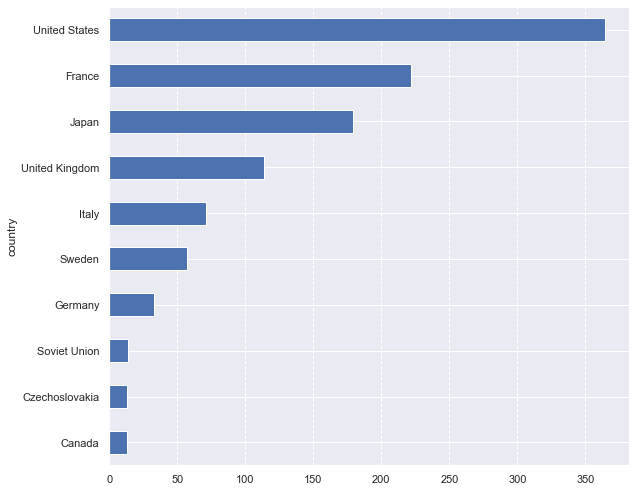

In [249]:
ax = film_df.groupby('country').director.count().\
     sort_values(ascending = False).head(10).\
     sort_values(ascending = True).\
     plot(kind = 'barh', figsize = (9, 7))
ax.grid(linestyle = '--', axis = 'x')
plt.tight_layout()
plt.savefig("film_by_country.pdf")

### 479 directors in total¶


In [49]:
film_df.director.nunique()


479

### Counts of unique directors by country


In [50]:
film_df.groupby('country').director.nunique().sort_values(ascending = False)


country
United States     207
France             73
United Kingdom     61
Japan              44
Italy              26
Sweden             12
Germany            12
Czechoslovakia      9
Spain               8
Soviet Union        7
Mexico              6
Canada              5
Denmark             5
Poland              4
Hong Kong           3
India               3
Belgium             3
Australia           3
Austria             2
West Germany        2
Senegal             2
South Korea         2
Taiwan              2
Turkey              2
Brazil              1
China               1
Cuba                1
Bangladesh          1
Finland             1
Yugoslavia          1
Kazakhstan          1
Guatemala           1
Iran                1
Ireland             1
Macedonia           1
Morocco             1
Netherlands         1
New Zealand         1
Norway              1
Philippines         1
Portugal            1
Romania             1
Thailand            1
Argentina           1
Name: director, dtype: i

### Where the majority of the directors are from


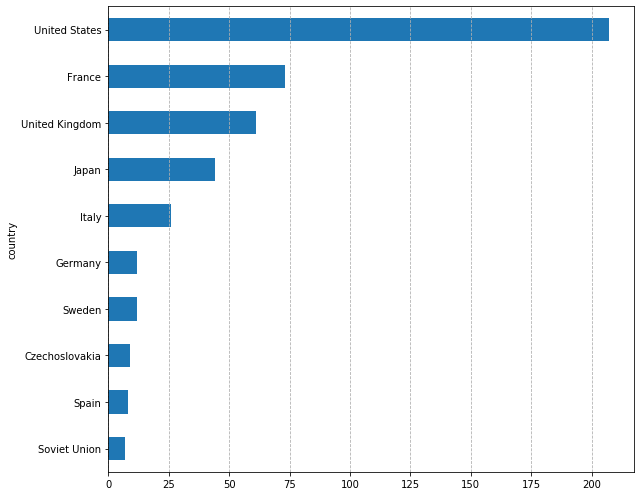

In [74]:
ax = film_df.groupby('country').director.nunique().\
     sort_values(ascending = False).head(10).sort_values(ascending = True).\
     plot(kind = 'barh', figsize = (9, 7))
ax.grid(linestyle = '--', axis = 'x')
plt.tight_layout()
plt.savefig("dir_by_country.pdf")

### 207 directors are from the U.S.


In [53]:
len(film_df[film_df.country == 'United States'].director.unique().tolist())


207

### 10 U.S. directors with the most number of films liscened by CC


In [55]:
film_df[film_df.country == 'United States'].director.value_counts().head(10)


Ernst Lubitsch         9
Josef von Sternberg    9
Samuel Fuller          8
Robert Altman          7
Charles Chaplin        7
Wes Anderson           7
Richard Linklater      6
John Cassavetes        6
Steven Soderbergh      6
Robert Downey Sr.      5
Name: director, dtype: int64

### 73 directors are from France


In [56]:
len(film_df[film_df.country == 'France'].director.unique().tolist())


73

### 10 French directors with the most number of films liscened by CC


In [57]:
film_df[film_df.country == 'France'].director.value_counts().head(20)


Louis Malle              14
Jean-Luc Godard          12
Jean Renoir              11
Agnès Varda              10
Jean-Pierre Melville      9
François Truffaut         9
Robert Bresson            7
Jacques Demy              6
Julien Duvivier           6
Eric Rohmer               6
Luis Buñuel               6
Jacques Tati              6
Sacha Guitry              5
Pierre Etaix              5
Henri-Georges Clouzot     5
Jean Cocteau              4
Max Ophuls                4
Alain Resnais             4
Olivier Assayas           4
Claude Autant-Lara        4
Name: director, dtype: int64

### CC liscened most films from these directors


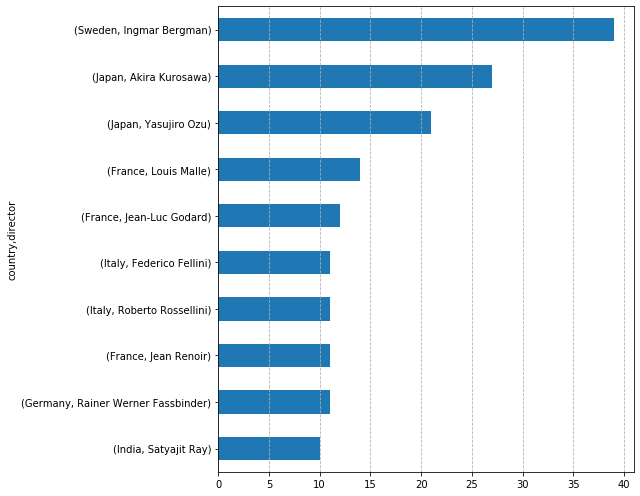

In [75]:
ax = film_df.groupby('country').director.value_counts().sort_values(ascending = False).head(10).sort_values().plot(kind = 'barh', figsize = (9, 7))
ax.grid(linestyle = '--', axis = 'x')
plt.tight_layout()
plt.savefig("top_dir.pdf")

In [59]:
info_df = pd.read_csv('info.csv')
info_df.head()

,Blu-Ray/DVD Combo_rp,Blu-Ray/DVD Combo_sp,Blu-Ray_rp,Blu-Ray_sp,DVD_rp,DVD_sp,Essential Art House DVD_rp,Essential Art House DVD_sp,Janus Films DVD_rp,Janus Films DVD_sp,aspect_ratio,color,description,dir_link,duration,lang,title,year
0,NaN,NaN,NaN,NaN,$29.95,$23.96,NaN,NaN,NaN,NaN,2.35:1,Color,In 2 or 3 Things I Know About Her (2 ou 3 chos...,/shop/browse?director=godard-jean-luc,87 minutes,French,2 or 3 Things I Know About Her,1955
1,NaN,NaN,$39.95,$31.96,$39.95,$31.96,NaN,NaN,NaN,NaN,1.85:1,Black & White,"In this beautifully shot, psychologically comp...",/shop/browse?director=daves-delmer,92 minutes,English,3:10 to Yuma,1955
2,NaN,NaN,$39.95,$31.96,$39.95,$31.96,NaN,NaN,NaN,NaN,2.35:1,Color,"In a dusty, underpopulated California resort t...",/shop/browse?director=altman-robert,124 minutes,English,3 Women,1955
3,NaN,NaN,$39.95,$31.96,$39.95,$31.96,NaN,NaN,NaN,NaN,2.35:1,Color,Romanian filmmaker Cristian Mungiu shot to int...,/shop/browse?director=mungiu-cristian,113 minutes,Romanian,"4 Months, 3 Weeks and 2 Days",1955
4,NaN,NaN,$39.95,$31.96,$39.95,$31.96,NaN,NaN,NaN,NaN,1.85:1,Black & White,"Marcello Mastroianni plays Guido Anselmi, a di...",/shop/browse?director=fellini-federico,138 minutes,"English, ...",8½,1955


In [91]:
info_df['year'] = info_df.year.astype(int)

In [55]:
info_df['duration'] = info_df.duration.str.replace('minutes', '')

In [122]:
merge = film_df.merge(info_df, left_on = 'title', right_on = 'title').drop(columns = 'year_y')

In [181]:
merge['country'] = merge.country.replace('Soviet Union', 'Russia').replace('West Germany', 'Germany').replace('Czechoslovakia', 'Czech Republic').replace('Yugoslavia', 'Serbia')

In [172]:
from pycountry_convert import country_alpha2_to_continent_code
from pycountry_convert import country_name_to_country_alpha2

In [183]:
merge['country_code'] = merge['country'].apply(country_name_to_country_alpha2)

In [185]:
merge['continent'] = merge['country_code'].apply(country_alpha2_to_continent_code)

In [223]:
merge['ar'] = merge['aspect_ratio'].str.extract('(.+):1')

In [232]:
merge['ar'] = merge['ar'].replace('1:33', '1.33')
merge['ar'] = merge['ar'].astype(float)

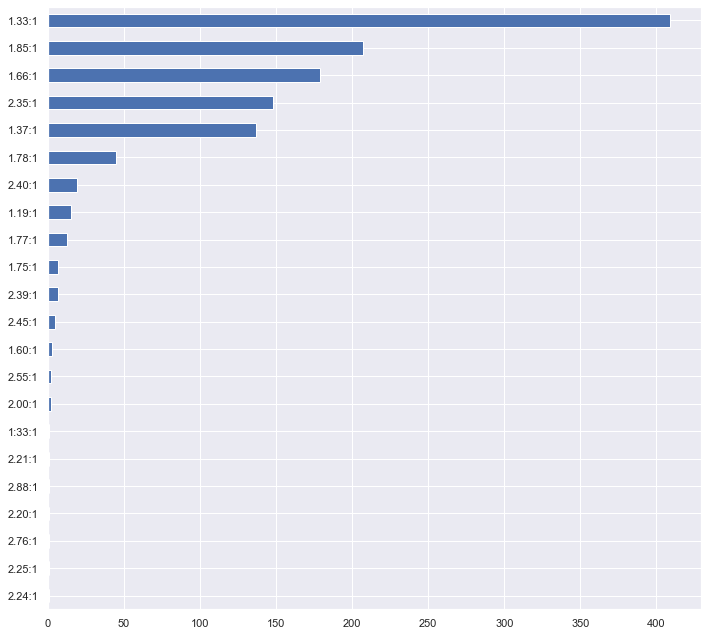

In [250]:
info_df.aspect_ratio.value_counts().sort_values().plot(kind = 'barh', figsize = (10, 9))
plt.tight_layout()
plt.savefig("ar_count")

In [79]:
info_df['duration'] = pd.to_numeric(info_df.duration)

In [86]:
info_df.duration.describe()

count    1208.000000
mean      108.394040
std        50.462488
min        11.000000
25%        89.000000
50%       100.000000
75%       115.000000
max       902.000000
Name: duration, dtype: float64

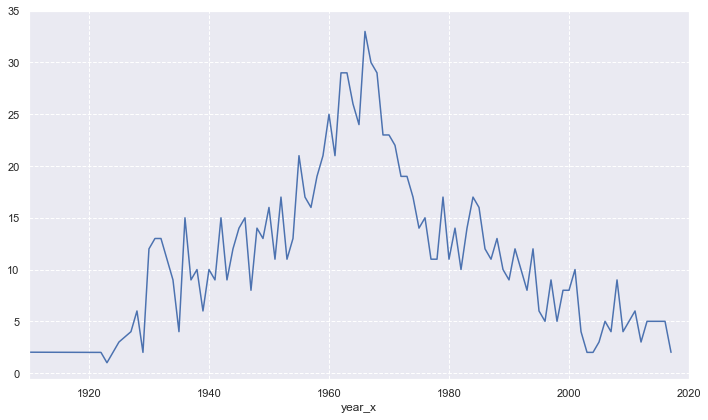

In [251]:
merge['year_x'] = merge.year_x
ax = merge.groupby('year_x').title.count().plot(figsize = (10, 6))
ax.set_xlim(1910,2019)
ax.set_xticks([1920, 2020], 20)
ax.set_yticks([0, 35], 5)
ax.grid(linestyle = '--')

plt.tight_layout()
plt.savefig("year_count.pdf")

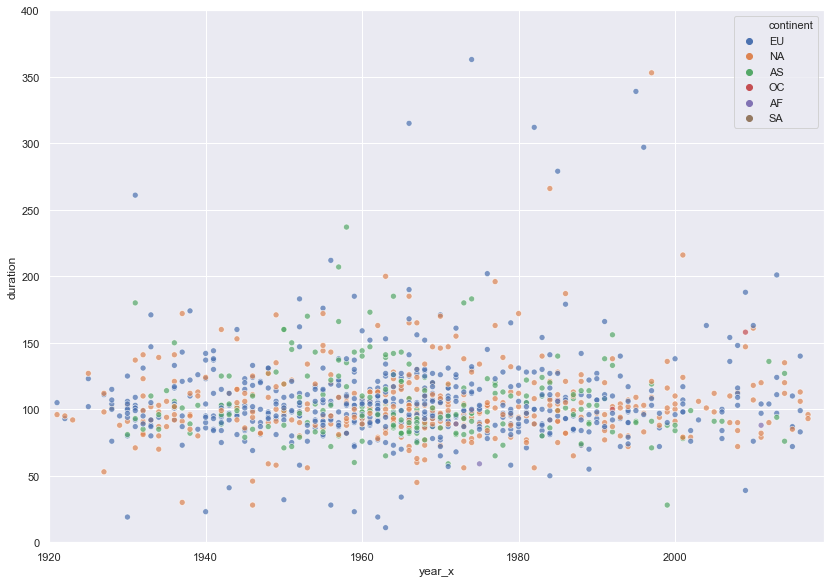

In [252]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
ax = sns.scatterplot(data = merge, x = 'year_x', y = 'duration', alpha = 0.7, hue = 'continent')
ax.set_xlim(1920, 2019)
ax.set_ylim(0, 400)

plt.tight_layout()
plt.savefig("year_vs_duration.pdf")

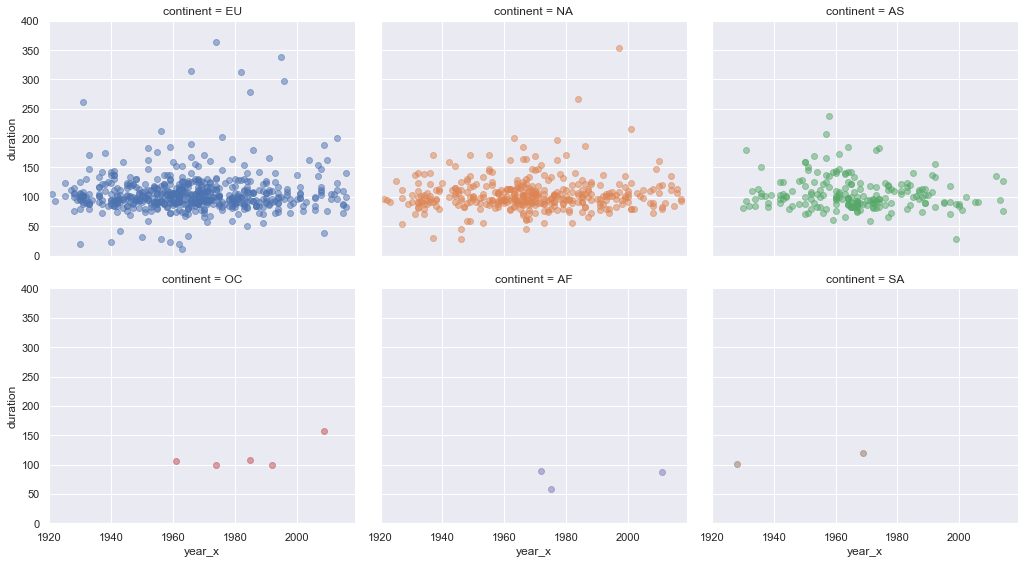

In [253]:
# sns.set(rc={'figure.figsize':(11.7,8.27)})
# ax = sns.scatterplot(data = merge, x = 'year_x', y = 'duration', alpha = 0.7, hue = 'continent')
# ax.set_xlim(1920, 2019)
# ax.set_ylim(0, 400)

g = sns.FacetGrid(merge, col="continent", margin_titles=True, height=4, aspect = 1.2, hue = 'continent', col_wrap = 3)
g.map(plt.scatter, "year_x", "duration", alpha = 0.5)
g.set(xlim=(1920, 2019), ylim=(0, 400))

plt.tight_layout()
plt.savefig("year_vs_duration_facet.pdf")

In [111]:
merge

,title,director,country,spine,url,img,year_x,Blu-Ray/DVD Combo_rp,Blu-Ray/DVD Combo_sp,Blu-Ray_rp,...,Essential Art House DVD_rp,Essential Art House DVD_sp,Janus Films DVD_rp,Janus Films DVD_sp,aspect_ratio,color,description,dir_link,duration,lang
0,2 or 3 Things I Know About Her,Jean-Luc Godard,France,482.0,https://www.criterion.com/films/1333-2-or-3-th...,https://s3.amazonaws.com/criterion-production/...,1957.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,2.35:1,Color,In 2 or 3 Things I Know About Her (2 ou 3 chos...,/shop/browse?director=godard-jean-luc,87.0,French
1,3:10 to Yuma,Delmer Daves,United States,657.0,https://www.criterion.com/films/27910-3-10-to-...,https://s3.amazonaws.com/criterion-production/...,NaN,NaN,NaN,$39.95,...,NaN,NaN,NaN,NaN,1.85:1,Black & White,"In this beautifully shot, psychologically comp...",/shop/browse?director=daves-delmer,92.0,English
2,3 Women,Robert Altman,United States,230.0,https://www.criterion.com/films/712-3-women,https://s3.amazonaws.com/criterion-production/...,NaN,NaN,NaN,$39.95,...,NaN,NaN,NaN,NaN,2.35:1,Color,"In a dusty, underpopulated California resort t...",/shop/browse?director=altman-robert,124.0,English
3,"4 Months, 3 Weeks and 2 Days",Cristian Mungiu,Romania,958.0,https://www.criterion.com/films/28617-4-months...,https://s3.amazonaws.com/criterion-production/...,1963.0,NaN,NaN,$39.95,...,NaN,NaN,NaN,NaN,2.35:1,Color,Romanian filmmaker Cristian Mungiu shot to int...,/shop/browse?director=mungiu-cristian,113.0,Romanian
4,8½,Federico Fellini,Italy,140.0,https://www.criterion.com/films/150-8-1-2,https://s3.amazonaws.com/criterion-production/...,1957.0,NaN,NaN,$39.95,...,NaN,NaN,NaN,NaN,1.85:1,Black & White,"Marcello Mastroianni plays Guido Anselmi, a di...",/shop/browse?director=fellini-federico,138.0,"English, ..."
5,12 Angry Men,Sidney Lumet,United States,591.0,https://www.criterion.com/films/27871-12-angry...,https://s3.amazonaws.com/criterion-production/...,2017.0,NaN,NaN,$39.95,...,NaN,NaN,NaN,NaN,1.66:1,Black & White,"12 Angry Men, by Sidney Lumet, may be the most...",/shop/browse?director=lumet-sidney,96.0,English
6,24 Frames,Abbas Kiarostami,Iran,956.0,https://www.criterion.com/films/29399-24-frames,https://s3.amazonaws.com/criterion-production/...,1935.0,NaN,NaN,$39.95,...,NaN,NaN,NaN,NaN,1.78:1,Color,"For what would prove to be his final film, Ira...",/shop/browse?director=kiarostami-abbas,114.0,NaN
7,The 39 Steps,Alfred Hitchcock,United Kingdom,56.0,https://www.criterion.com/films/234-the-39-steps,https://s3.amazonaws.com/criterion-production/...,2015.0,NaN,NaN,$39.95,...,NaN,NaN,NaN,NaN,1.33:1,Black & White,"A heart-racing spy story by Alfred Hitchcock, ...",/shop/browse?director=hitchcock-alfred,86.0,English
8,45 Years,Andrew Haigh,United Kingdom,861.0,https://www.criterion.com/films/28908-45-years,https://s3.amazonaws.com/criterion-production/...,1941.0,NaN,NaN,$39.95,...,NaN,NaN,NaN,NaN,1.85:1,Color,"In this exquisitely calibrated film, Charlotte...",/shop/browse?director=haigh-andrew,95.0,English
9,49th Parallel,Michael Powell,United Kingdom,376.0,https://www.criterion.com/films/520-49th-parallel,https://s3.amazonaws.com/criterion-production/...,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1.33:1,Black & White,At once a compelling piece of anti-isolationis...,/shop/browse?director=powell-michael,123.0,English
